In [1]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:06<00:00, 135MB/s]
100% 812M/812M [00:06<00:00, 125MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.5800.jpg', 'cat.9283.jpg', 'dog.11854.jpg', 'dog.8235.jpg', 'cat.9470.jpg', 'dog.5951.jpg', 'cat.2087.jpg', 'cat.9047.jpg', 'dog.8844.jpg', 'dog.11640.jpg', 'cat.1358.jpg', 'dog.56.jpg', 'cat.9181.jpg', 'dog.10206.jpg', 'dog.11595.jpg', 'cat.9184.jpg', 'dog.9399.jpg', 'cat.12487.jpg', 'cat.7612.jpg', 'dog.3087.jpg', 'dog.1278.jpg', 'cat.5923.jpg', 'cat.12152.jpg', 'cat.12495.jpg', 'cat.7465.jpg', 'cat.10803.jpg', 'dog.1027.jpg', 'cat.4485.jpg', 'dog.12365.jpg', 'cat.6583.jpg', 'cat.2260.jpg', 'dog.9167.jpg', 'cat.8116.jpg', 'dog.8139.jpg', 'cat.1275.jpg', 'cat.10431.jpg', 'cat.6540.jpg', 'dog.8363.jpg', 'dog.8087.jpg', 'cat.3886.jpg', 'cat.10238.jpg', 'dog.2736.jpg', 'cat.1190.jpg', 'dog.10188.jpg', 'cat.6040.jpg', 'cat.7049.jpg', 'dog.2269.jpg', 'cat.11503.jpg', 'dog.11980.jpg', 'cat.8947.jpg', 'cat.8693.jpg', 'dog.5886.jpg', 'dog.8186.jpg', 'dog.8431.jpg', 'dog.6768.jpg', 'dog.1948.jpg', 'dog.7520.jpg', 'cat.6966.jpg', 'dog.6111.jpg', 'cat.10532.jpg', 'dog.6706.jpg', 'cat.1685.

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

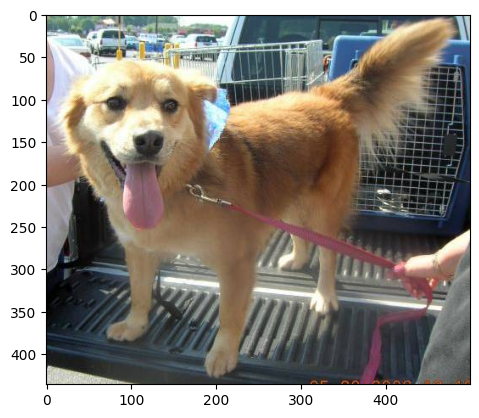

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.11854.jpg')
imgplt = plt.imshow(img)
plt.show()

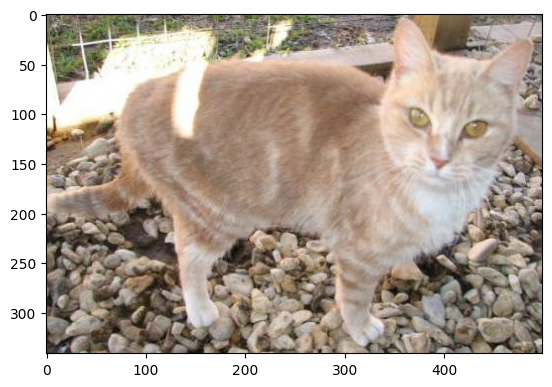

In [11]:
#display cat image
img=mpimg.imread('/content/train/cat.5800.jpg')
imgplt=plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
cat
dog
dog
cat


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [14]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

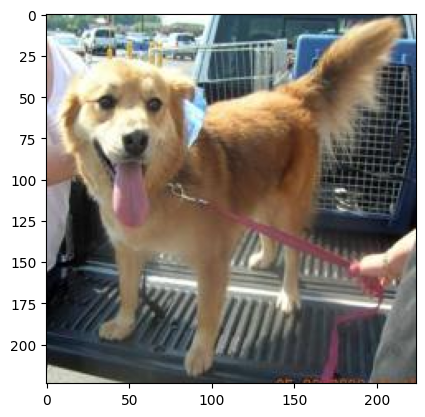

In [16]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.11854.jpg')
imgplt = plt.imshow(img)
plt.show()

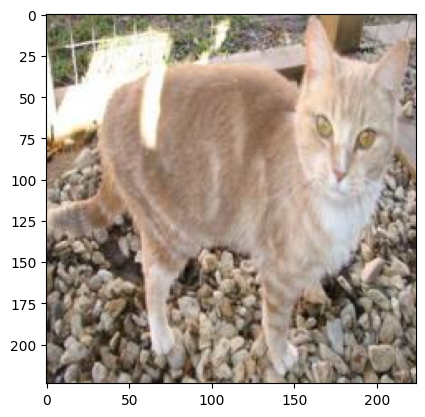

In [17]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.5800.jpg')
imgplt = plt.imshow(img)
plt.show()

In [18]:
#creating a for loop to create labels
filenames=os.listdir('/content/image resized/')
labels=[]
for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]
  if label=='dog':
    labels.append(1)
  elif label=='cat':
    labels.append(0)

In [19]:
print(filenames[0:5])
print(len(filenames))

['cat.5800.jpg', 'cat.9283.jpg', 'dog.11854.jpg', 'dog.8235.jpg', 'cat.9470.jpg']
2000


In [20]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 0]
2000


In [21]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1003  997]


In [22]:
import cv2
import glob

In [23]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [24]:
print(dog_cat_images)

[[[[ 97 114 123]
   [101 118 127]
   [109 126 135]
   ...
   [ 92 102 102]
   [ 92 100  99]
   [ 77  85  84]]

  [[ 98 115 124]
   [ 93 110 119]
   [101 118 127]
   ...
   [109 119 119]
   [111 119 118]
   [ 87  95  94]]

  [[104 119 128]
   [ 92 107 116]
   [ 99 115 122]
   ...
   [122 130 130]
   [124 129 130]
   [ 98 103 104]]

  ...

  [[ 57  61  72]
   [ 60  64  75]
   [ 67  69  79]
   ...
   [ 59  72  80]
   [102 114 120]
   [127 139 145]]

  [[ 60  62  73]
   [ 68  70  81]
   [ 75  76  86]
   ...
   [ 43  56  64]
   [ 92 104 110]
   [121 132 136]]

  [[ 51  53  64]
   [ 59  61  72]
   [ 67  66  76]
   ...
   [ 16  29  37]
   [ 82  92  99]
   [110 121 125]]]


 [[[ 76  94 101]
   [ 80  98 105]
   [ 80  98 105]
   ...
   [ 77  96 104]
   [ 81 100 108]
   [155 174 182]]

  [[ 71  89  96]
   [ 76  94 101]
   [ 78  96 103]
   ...
   [ 78  97 105]
   [ 81 100 108]
   [154 173 181]]

  [[ 67  85  92]
   [ 72  90  97]
   [ 75  93 100]
   ...
   [ 84 103 111]
   [ 85 104 112]
   [154 173

In [25]:
type(dog_cat_images)

numpy.ndarray

In [26]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [27]:
X = dog_cat_images
Y = np.asarray(labels)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [30]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
print(X_train_scaled)

[[[[0.0745098  0.36470588 0.27058824]
   [0.08627451 0.36862745 0.27843137]
   [0.09411765 0.36078431 0.27058824]
   ...
   [0.14509804 0.25098039 0.21176471]
   [0.16470588 0.27058824 0.23137255]
   [0.18431373 0.29019608 0.25098039]]

  [[0.05490196 0.34509804 0.25098039]
   [0.05490196 0.3372549  0.24705882]
   [0.0627451  0.32941176 0.23921569]
   ...
   [0.14117647 0.24705882 0.20784314]
   [0.15686275 0.2627451  0.22352941]
   [0.16862745 0.2745098  0.23529412]]

  [[0.03137255 0.32941176 0.23529412]
   [0.03529412 0.3254902  0.23137255]
   [0.04705882 0.32156863 0.23137255]
   ...
   [0.13333333 0.22745098 0.19607843]
   [0.14509804 0.23921569 0.20784314]
   [0.15294118 0.24705882 0.21568627]]

  ...

  [[0.5254902  0.58039216 0.62745098]
   [0.54117647 0.59607843 0.64313725]
   [0.5372549  0.59215686 0.63921569]
   ...
   [0.30196078 0.36862745 0.45098039]
   [0.30980392 0.36862745 0.44313725]
   [0.31372549 0.37254902 0.44705882]]

  [[0.54509804 0.6        0.64705882]
   [0.5

In [32]:
import tensorflow as tf
import tensorflow_hub as hub

In [33]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [34]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [35]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [37]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 88s 2s/step - loss: 0.2402 - acc: 0.8994
Epoch 2/5
50/50 [==============================] - 69s 1s/step - loss: 0.0603 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 72s 1s/step - loss: 0.0426 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 72s 1s/step - loss: 0.0342 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 74s 1s/step - loss: 0.0269 - acc: 0.9944


In [38]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0976 - acc: 0.9600
Test Loss = 0.09756619483232498
Test Accuracy = 0.9599999785423279


Path of the image to be predicted: /content/one.jpg


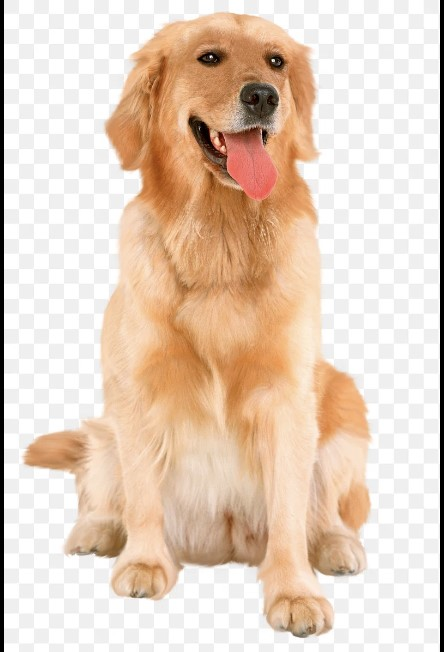

1/1 [==============================] - 1s 667ms/step
[[-4.8587008  2.5384612]]
1
The image represents a Dog


In [39]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/two.jpg


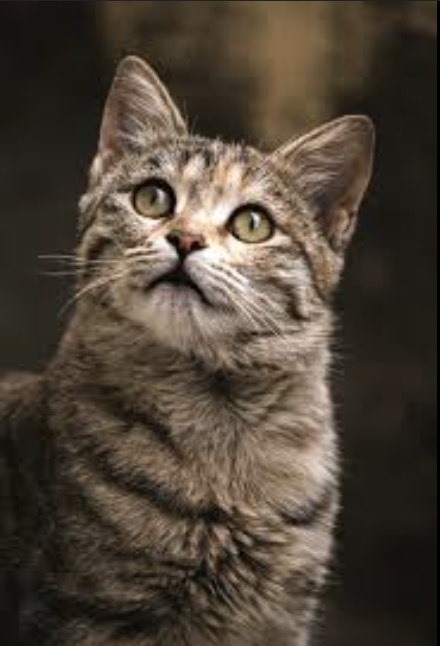

1/1 [==============================] - 0s 117ms/step
[[ 2.8571932 -4.1048546]]
0
The image represents a Cat


In [40]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [41]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.4 MB/s et

In [42]:

import gradio as gr

In [43]:
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [64]:

def predict_image(img):
  input_image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Resize the image to the required size
  input_image_resize = cv2.resize(input_image, (224, 224))

    # Scale the image
  input_image_scaled = input_image_resize / 255.0

    # Reshape the image to the required shape for the model
  image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Predict the input image using the model
  input_prediction = model.predict(image_reshaped)

    # Get the predicted label
  input_pred_label = np.argmax(input_prediction)

    # Determine the label name
  label_name = 'Cat' if input_pred_label == 0 else 'Dog'

  return {label_name: float(input_prediction[0][input_pred_label])}

In [52]:
!pip install gradio


In [54]:
!pip install gradio[inputs]

In [ ]:
image = gr.Image()
label = gr.Label()


gr.Interface(fn=lambda img: predict_image(img), inputs=image, outputs=label).launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c052de18896648fa7e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 54ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 521, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1935, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1513, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    r

1/1 [==============================] - 0s 55ms/step
